In [14]:
import numpy as np
import random
import os,sys
import requests
import torchvision
from utils import load_dataset

import urllib
import gzip

# matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

# seaborn
import seaborn as sns
sns.set()

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## 1. MNIST Dataset

In [1]:
import glob
    

In [2]:
glob.glob('data_tsne/cifar-10/cifar-10-batches-py/data_batch_1')

['data_tsne/cifar-10/cifar-10-batches-py/data_batch_1']

In [25]:
def load_cifar_batches(path='data/cifar10', kind='train'):
    X_list = []
    y_list = []
    if kind == 'train':
        for i in range(1,6):
            data = unpickle('{}/cifar-10-batches-py/data_batch_{}'.format(path,i))
            X, y = data[b'data'],data[b'labels']
            X_list.append(X)
            y_list.append(y)
        images = np.concatenate(X_list,axis=0)
        labels = np.concatenate(y_list)
    else:
        data = unpickle('{}/cifar-10-batches-py/test_batch'.format(path))
        images,labels = np.array(data[b'data']),np.array(data[b'labels'])
    return images, labels

In [26]:
X,y = load_cifar_batches(path='data/cifar10', kind='test')

In [27]:
X.shape, y.shape

((10000, 3072), (10000,))

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
data = unpickle('data_tsne/cifar-10/cifar-10-batches-py/data_batch_1')

In [12]:
data[b'data'].shape

(10000, 3072)

In [2]:
dataset = 'mnist'

In [3]:
# load dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset(dataset)

Loaded data ... Get data stats:
X_train: (55000, 784) 	y_train: (55000,)
X_val: (5000, 784) 	y_val: (5000,)
X_test: (10000, 784) 	y_train: (10000,)
X_dev: (500, 784) 	y_dev: (500,)


In [ ]:
# # dir for storing training curves
# assets_dir = './assets/'
# # create assets dir if it does not exist
# if not os.path.exists(assets_dir):
#     os.makedirs(assets_dir)
    
# num_samples_per_class = 5
# num_class = 10
# fig,axs = plt.subplots(nrows=num_samples_per_class,ncols=num_class,figsize=(20,10))

# for class_idx in range(num_class):
#     X_class = X_train[y_train==class_idx].reshape(-1,28,28)
#     choose = np.random.choice(range(len(X_class)),num_samples_per_class,replace=False)
#     X_sample = X_class[choose]
#     for sample_idx in range(num_samples_per_class):
#         axs[sample_idx,class_idx].imshow(X_sample[sample_idx],cmap='gray')
#         axs[sample_idx,class_idx].axis('off')
#         if sample_idx==0:
#             axs[sample_idx,class_idx].set_title("Class: {}".format(class_idx))

# plt.savefig(assets_dir+"class_sample_visualisation.png",dpi=300)
# plt.show()

Loaded data ... Get data stats:
X_train: (55000, 784) 	y_train: (55000,)
X_val: (5000, 784) 	y_val: (5000,)
X_test: (10000, 784) 	y_train: (10000,)
X_dev: (500, 784) 	y_dev: (500,)
Training autoencoder for reduced dimension: 4
Getting reduced dimension data
Training autoencoder for reduced dimension: 8
Getting reduced dimension data
Training autoencoder for reduced dimension: 16
Getting reduced dimension data
Training autoencoder for reduced dimension: 64
Getting reduced dimension data
Training autoencoder for reduced dimension: 128
Getting reduced dimension data
Training autoencoder for reduced dimension: 256
Getting reduced dimension data


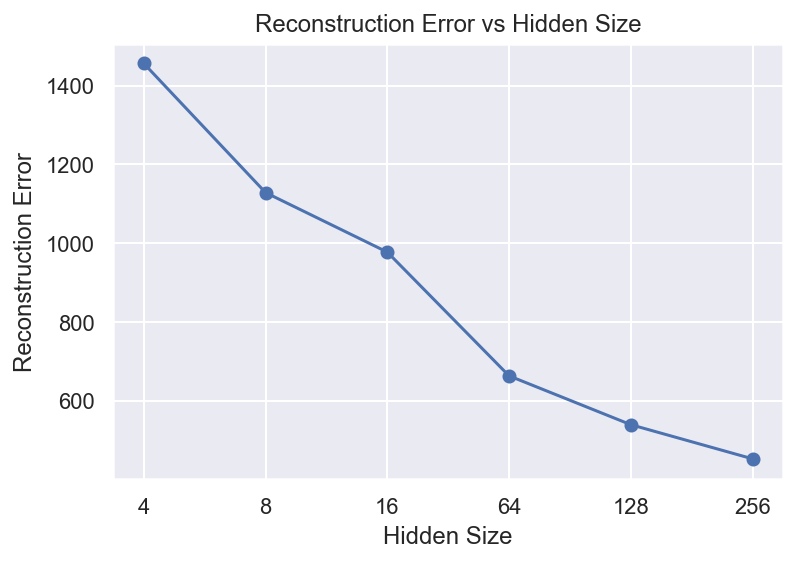

In [17]:
# reconstruction error
from evalutation import get_reconstruction_error_curve
error_log = get_reconstruction_error_curve(method='autoencoder',dataset='fashion-mnist')

In [ ]:
plt.plot(error_log, '-o')
plt.xticks(range(len(error_log)), hidden_size_list)
plt.xlabel('Hidden Size')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs Hidden Size')
plt.show()